## 📍 **Naive Bayes**

Neste documento, estamos utilizando os dados pré-processados para realizar a classificação do dataframe `'census.csv'` por meio do algoritmo de naive bayes.

### 📍 **Importação de Bibliotecas, Módulos e Variáveis essenciais**


In [1]:
! pip install yellowbrick

In [2]:
import pickle as pk
import numpy as np
import matplotlib.pyplot as plt

from sklearn.naive_bayes import GaussianNB

### 📌 **Naive Bayes: conjunto sem balanceamento**

In [3]:
with open('../sample_data/census.pkl', 'rb') as f:
    X_census_training_set, y_census_training_set, X_census_test_set, y_census_test_set, df_transformed, one_hot_encoder_census = pk.load(f)

In [4]:
X_census_training_set.shape, y_census_training_set.shape

((27676, 105), (27676,))

In [5]:
X_census_test_set.shape, y_census_test_set.shape

((4885, 105), (4885,))

In [6]:
naive_census = GaussianNB()
naive_census.fit(X_census_training_set, y_census_training_set)

GaussianNB()

In [7]:
predictor = naive_census.predict(X_census_test_set)
predictor

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [8]:
y_census_test_set

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [9]:
naive_census.classes_

array([' <=50K', ' >50K'], dtype='<U6')

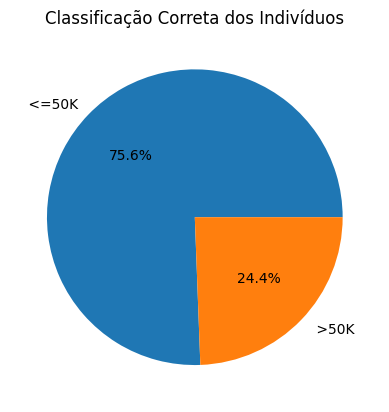

In [10]:
unique, counts = np.unique(y_census_test_set, return_counts=True)
plt.pie(counts, labels = unique, autopct='%1.1f%%')
plt.title('Classificação Correta dos Indivíduos')
plt.show()

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [11]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from yellowbrick.classifier import ConfusionMatrix

In [12]:
accuracy_score(y_census_test_set, predictor)

0.581985670419652

In [13]:
print(classification_report(y_census_test_set, predictor))

              precision    recall  f1-score   support

       <=50K       0.96      0.47      0.63      3693
        >50K       0.36      0.93      0.52      1192

    accuracy                           0.58      4885
   macro avg       0.66      0.70      0.58      4885
weighted avg       0.81      0.58      0.60      4885



0.581985670419652

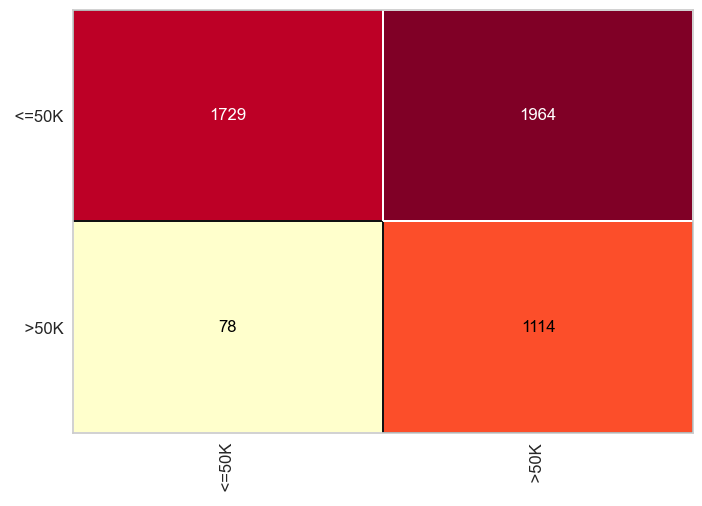

In [14]:
cm = ConfusionMatrix(naive_census)
cm.fit(X_census_training_set, y_census_training_set)
cm.score(X_census_test_set, y_census_test_set)

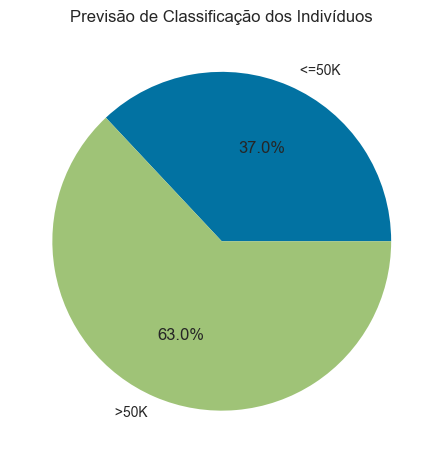

In [15]:

unique, counts = np.unique(predictor, return_counts=True)
plt.pie(counts, labels = unique, autopct='%1.1f%%')
plt.title('Previsão de Classificação dos Indivíduos')
plt.show()

### 📌 **Naive Bayes: conjunto com balanceamento do tipo 'Random Over Sampling'**

In [16]:
with open('../sample_data/census_ros.pkl', 'rb') as f_ros:
    X_census_training_set_ros, y_census_training_set_ros, X_census_test_set_ros, y_census_test_set_ros, df_transformed, one_hot_encoder_census = pk.load(f_ros)

In [17]:
X_census_training_set_ros.shape, y_census_training_set_ros.shape

((42054, 105), (42054,))

In [18]:
X_census_test_set_ros.shape, y_census_test_set_ros.shape

((4885, 105), (4885,))

In [19]:
naive_census_ros = GaussianNB()
naive_census_ros.fit(X_census_training_set_ros, y_census_training_set_ros)

GaussianNB()

In [20]:
predictor_ros = naive_census_ros.predict(X_census_test_set_ros)
predictor_ros

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [21]:
y_census_test_set_ros

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [22]:
accuracy_score(y_census_test_set_ros, predictor_ros)

0.5768679631525077

In [23]:
print(classification_report(y_census_test_set_ros, predictor_ros))

              precision    recall  f1-score   support

       <=50K       0.96      0.46      0.62      3693
        >50K       0.36      0.94      0.52      1192

    accuracy                           0.58      4885
   macro avg       0.66      0.70      0.57      4885
weighted avg       0.81      0.58      0.60      4885



0.5768679631525077

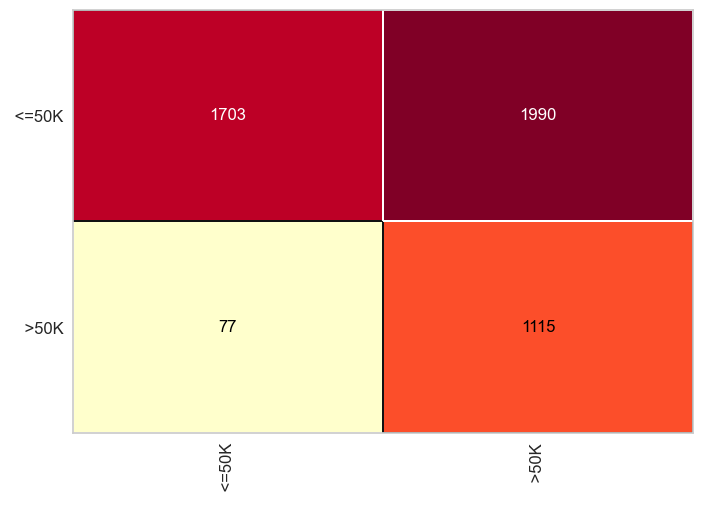

In [24]:
cm = ConfusionMatrix(naive_census_ros)
cm.fit(X_census_training_set_ros, y_census_training_set_ros)
cm.score(X_census_test_set_ros, y_census_test_set_ros)

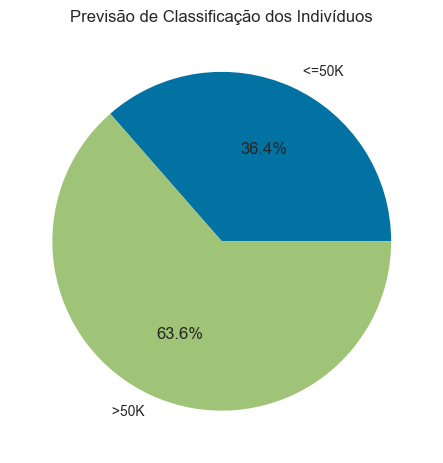

In [25]:

unique, counts = np.unique(predictor_ros, return_counts=True)
plt.pie(counts, labels = unique, autopct='%1.1f%%')
plt.title('Previsão de Classificação dos Indivíduos')
plt.show()

### 📌 **Naive Bayes: conjunto com balanceamento do tipo 'SMOTE'**

In [26]:
with open('../sample_data/census_smote.pkl', 'rb') as f_smote:
    X_census_training_set_smote, y_census_training_set_smote, X_census_test_set_smote, y_census_test_set_smote, df_transformed, one_hot_encoder_census = pk.load(f_smote)

In [27]:
X_census_training_set_smote.shape, y_census_training_set_smote.shape

((42054, 105), (42054,))

In [28]:
X_census_test_set_smote.shape, y_census_test_set_smote.shape

((4885, 105), (4885,))

In [29]:
naive_census_smote = GaussianNB()
naive_census_smote.fit(X_census_training_set_smote, y_census_training_set_smote)

GaussianNB()

In [30]:
predictor_smote = naive_census_smote.predict(X_census_test_set_smote)
predictor_smote

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [31]:
y_census_test_set_smote

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [32]:
accuracy_score(y_census_test_set_smote, predictor_smote)

0.5905834186284544

In [33]:
print(classification_report(y_census_test_set_smote, predictor_smote))

              precision    recall  f1-score   support

       <=50K       0.95      0.49      0.64      3693
        >50K       0.36      0.91      0.52      1192

    accuracy                           0.59      4885
   macro avg       0.65      0.70      0.58      4885
weighted avg       0.80      0.59      0.61      4885



0.5905834186284544

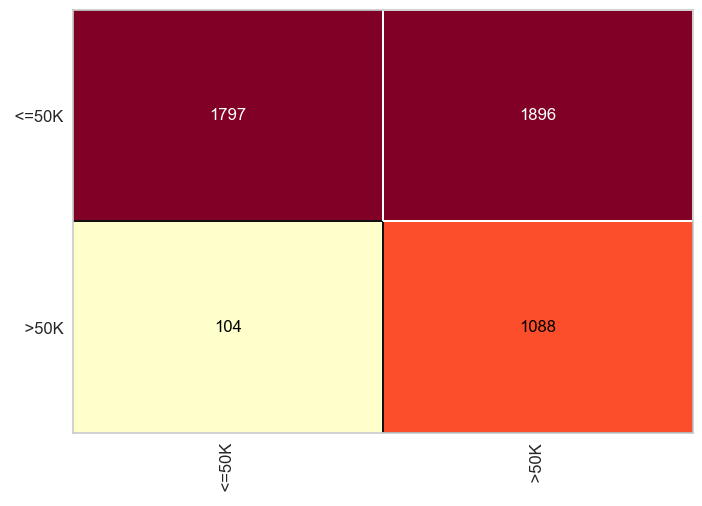

In [34]:
cm = ConfusionMatrix(naive_census_smote)
cm.fit(X_census_training_set_smote, y_census_training_set_smote)
cm.score(X_census_test_set_smote, y_census_test_set_smote)

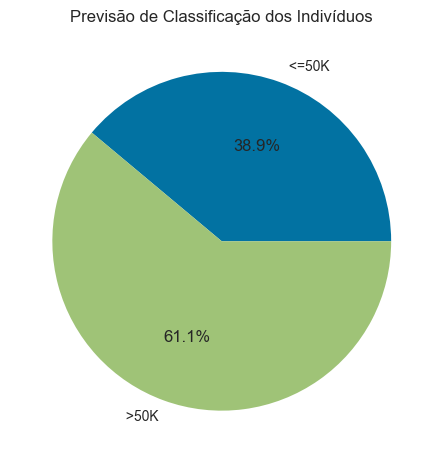

In [35]:

unique, counts = np.unique(predictor_smote, return_counts=True)
plt.pie(counts, labels = unique, autopct='%1.1f%%')
plt.title('Previsão de Classificação dos Indivíduos')
plt.show()

### 📌 **Naive Bayes: conjunto com balanceamento do tipo 'Random Under Sampling'**

In [36]:
with open('../sample_data/census_rus.pkl', 'rb') as f_rus:
    X_census_training_set_rus, y_census_training_set_rus, X_census_test_set_rus, y_census_test_set_rus, df_transformed, one_hot_encoder_census = pk.load(f_rus)

In [37]:
X_census_training_set_rus.shape, y_census_training_set_rus.shape

((13298, 105), (13298,))

In [38]:
X_census_test_set_rus.shape, y_census_test_set_rus.shape

((4885, 105), (4885,))

In [39]:
naive_census_rus = GaussianNB()
naive_census_rus.fit(X_census_training_set_rus, y_census_training_set_rus)

GaussianNB()

In [40]:
predictor_rus = naive_census_rus.predict(X_census_test_set_rus)
predictor_rus

array([' >50K', ' >50K', ' >50K', ..., ' <=50K', ' >50K', ' >50K'],
      dtype='<U6')

In [41]:
y_census_test_set_rus

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [42]:
accuracy_score(y_census_test_set_rus, predictor_rus)

0.5783009211873081

In [43]:
print(classification_report(y_census_test_set_rus, predictor_rus))

              precision    recall  f1-score   support

       <=50K       0.96      0.46      0.62      3693
        >50K       0.36      0.93      0.52      1192

    accuracy                           0.58      4885
   macro avg       0.66      0.70      0.57      4885
weighted avg       0.81      0.58      0.60      4885



0.5783009211873081

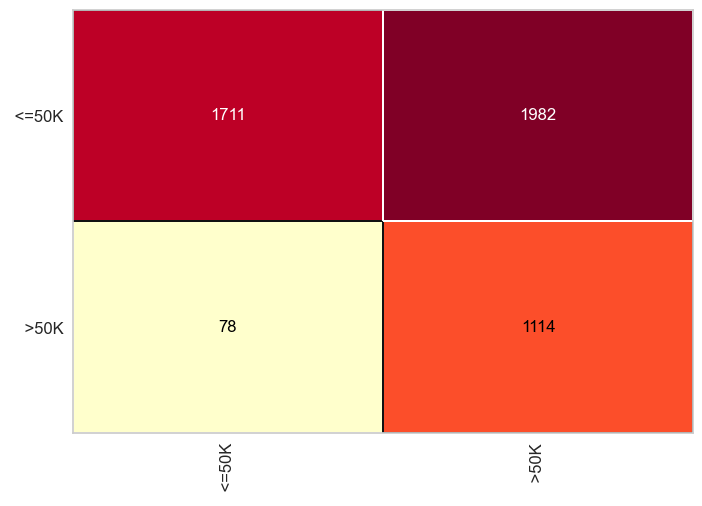

In [44]:
cm = ConfusionMatrix(naive_census_rus)
cm.fit(X_census_training_set_rus, y_census_training_set_rus)
cm.score(X_census_test_set_rus, y_census_test_set_rus)

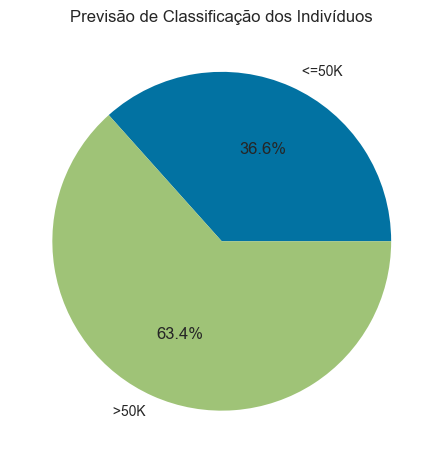

In [45]:

unique, counts = np.unique(predictor_rus, return_counts=True)
plt.pie(counts, labels = unique, autopct='%1.1f%%')
plt.title('Previsão de Classificação dos Indivíduos')
plt.show()

### 📌 **Naive Bayes: conjunto com balanceamento do tipo 'NearMiss'**

In [46]:
with open('../sample_data/census_nearmiss.pkl', 'rb') as f_nearmiss:
    X_census_training_set_nearmiss, y_census_training_set_nearmiss, X_census_test_set_nearmiss, y_census_test_set_nearmiss, df_transformed, one_hot_encoder_census = pk.load(f_nearmiss)

In [47]:
X_census_training_set_nearmiss.shape, y_census_training_set_nearmiss.shape

((13298, 105), (13298,))

In [48]:
X_census_test_set_nearmiss.shape, y_census_test_set_nearmiss.shape

((4885, 105), (4885,))

In [49]:
naive_census_nearmiss = GaussianNB()
naive_census_nearmiss.fit(X_census_training_set_nearmiss, y_census_training_set_nearmiss)

GaussianNB()

In [50]:
predictor_nearmiss = naive_census_nearmiss.predict(X_census_test_set_nearmiss)
predictor_nearmiss

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype='<U6')

In [51]:
y_census_test_set_nearmiss

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

##### ↬ **Estatísticas de Classificação e Matriz de Confusão**

In [52]:
accuracy_score(y_census_test_set_nearmiss, predictor_nearmiss)

0.7285568065506653

In [53]:
print(classification_report(y_census_test_set_nearmiss, predictor_nearmiss))

              precision    recall  f1-score   support

       <=50K       0.78      0.89      0.83      3693
        >50K       0.40      0.22      0.28      1192

    accuracy                           0.73      4885
   macro avg       0.59      0.56      0.56      4885
weighted avg       0.69      0.73      0.70      4885



0.7285568065506653

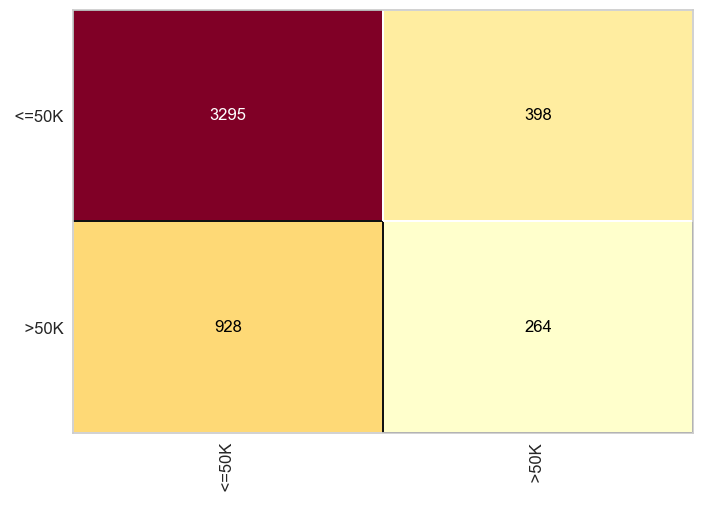

In [54]:
cm = ConfusionMatrix(naive_census_nearmiss)
cm.fit(X_census_training_set_nearmiss, y_census_training_set_nearmiss)
cm.score(X_census_test_set_nearmiss, y_census_test_set_nearmiss)

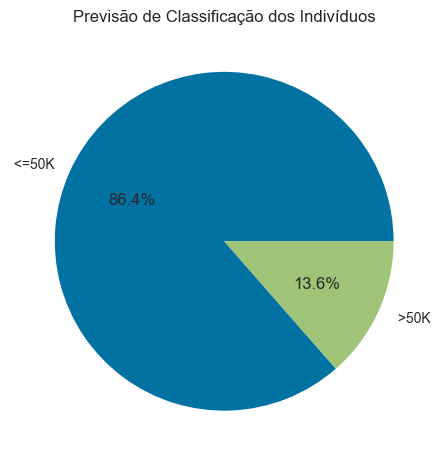

In [55]:

unique, counts = np.unique(predictor_nearmiss, return_counts=True)
plt.pie(counts, labels = unique, autopct='%1.1f%%')
plt.title('Previsão de Classificação dos Indivíduos')
plt.show()